# **Financial Statement Analysis**

In [ ]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Loading Data
# --- Update the file paths below to your local directory ---
purchase_price = pd.read_csv('/content/2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('/content/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('/content/EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('/content/InvoicePurchases12312016.csv')
final_purchases = pd.read_csv('/content/PurchasesFINAL12312016.csv')
final_sales = pd.read_csv('/content/SalesFINAL12312016.csv')

In [ ]:
# 3. Exploratory Data Analysis (EDA) and Cleaning

# --- PurchasePrice DataFrame ---
print("PurchasePrice Shape:", purchase_price.shape)
print("\nPurchasePrice Head:\n", purchase_price.head())
print("\nPurchasePrice Null Values:\n", purchase_price.isnull().sum())
# Dropping null values
purchase_price.dropna(inplace=True)
print("\nPurchasePrice Data Types:\n", purchase_price.dtypes)
print("\nPurchasePrice Description:\n", purchase_price.describe())


# --- BegInv DataFrame ---
print("\nBeginning Inventory Shape:", beg_inv.shape)
print("\nBeginning Inventory Head:\n", beg_inv.head())
print("\nBeginning Inventory Null Values:\n", beg_inv.isnull().sum())
print("\nBeginning Inventory Data Types:\n", beg_inv.dtypes)
print("\nBeginning Inventory Description:\n", beg_inv.describe())

# --- EndInv DataFrame ---
print("\nEnding Inventory Shape:", end_inv.shape)
print("\nEnding Inventory Head:\n", end_inv.head())
print("\nEnding Inventory Null Values:\n", end_inv.isnull().sum())
# Dropping null values
end_inv.dropna(inplace=True)


# --- Invoice DataFrame ---
print("\nInvoice Purchases Shape:", invoice_purchases.shape)
print("\nInvoice Purchases Head:\n", invoice_purchases.head())
print("\nInvoice Purchases Null Values:\n", invoice_purchases.isnull().sum())


# --- Final_Sales DataFrame ---
print("\nFinal Sales Shape:", final_sales.shape)
print("\nFinal Sales Head:\n", final_sales.head())
print("\nFinal Sales Null Values:\n", final_sales.isnull().sum())

PurchasePrice Shape: (12261, 9)

PurchasePrice Head:
    Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         

PurchasePrice Null Values:
 Brand             0
Description       1
Price             0
Size            

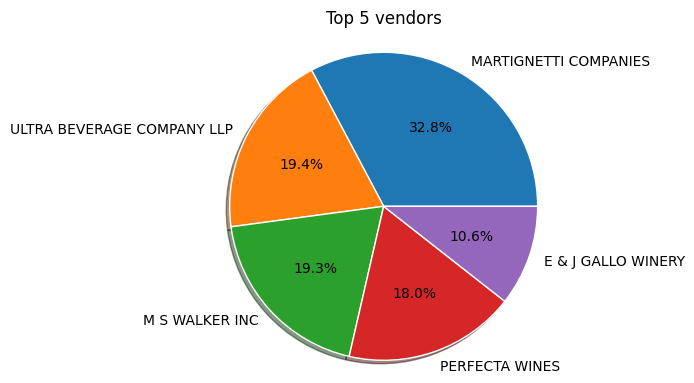

In [ ]:
# 4. Univariate Analysis

# --- Top 5 Vendors by count ---
plt.figure(figsize=(4,4))
mylabels = ["MARTIGNETTI COMPANIES", "ULTRA BEVERAGE COMPANY LLP", 'M S WALKER INC', 'PERFECTA WINES', 'E & J GALLO WINERY']
plt.pie(purchase_price.VendorName.value_counts()[0:5], labels=mylabels, autopct='%0.1f%%', radius=1.25,
        wedgeprops={'edgecolor':'white'}, textprops={'size':10}, shadow=True)
plt.title('Top 5 vendors\n')
plt.show()

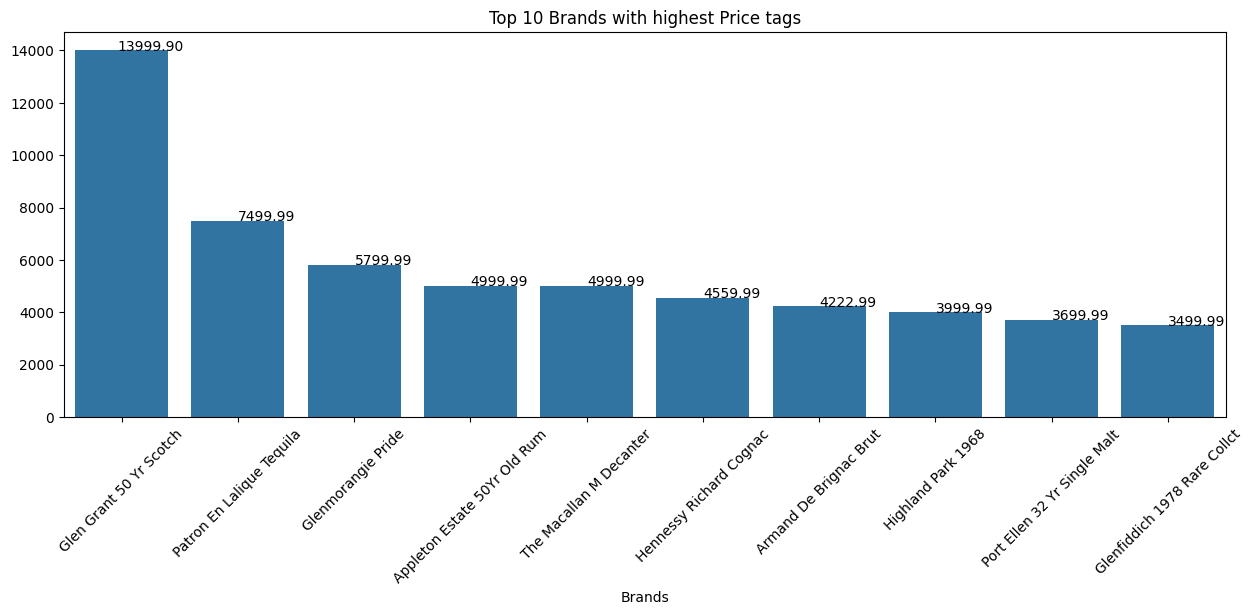


Invoice Purchases with Total Amount:
    VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   

       PODate     PayDate  Quantity  Dollars  Freight Approval  Total Amount  
0  2015-12-21  2016-02-16         6   214.26     3.47      NaN        217.73  
1  2015-12-22  2016-02-21        15   140.55     8.57      NaN        149.12  


/tmp/ipython-input-713842066.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=vc.index, y=vc.values, palette='magma')


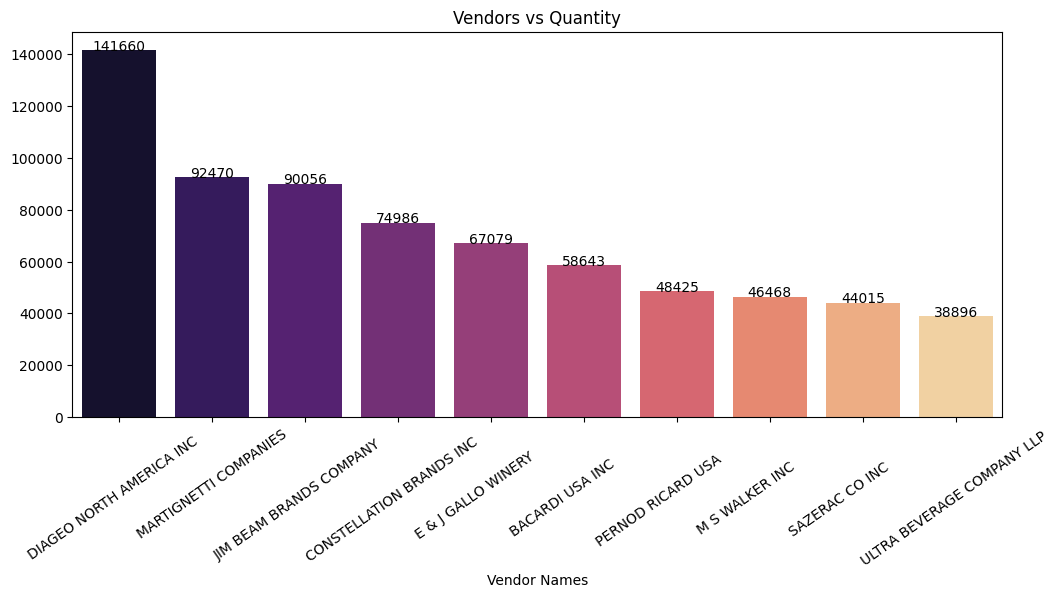

In [ ]:
# 5. Bivariate Analysis & Visualization 📊

# --- Top 10 Brands with highest Price tags ---
plt.figure(figsize=(15,5))
vc = purchase_price.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values)
for i, value in enumerate(vc):
    g.text(y=value-2, x=i+0.25, s=f'{value:.2f}', color='black', ha='center', fontsize=10)
plt.title('Top 10 Brands with highest Price tags')
plt.xlabel('Brands')
plt.xticks(rotation=45)
plt.show()

# --- Feature Engineering: Total Amount for Invoices ---
invoice_purchases['Total Amount'] = invoice_purchases['Dollars'] + invoice_purchases['Freight']
print("\nInvoice Purchases with Total Amount:\n", invoice_purchases.head(2))

# --- Vendors vs Quantity ---
plt.figure(figsize=(12,5))
vc = invoice_purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values, palette='magma')
for i, value in enumerate(vc):
    g.text(y=value-2, x=i, s=value, color='black', ha='center', fontsize=10)
plt.title('Vendors vs Quantity')
plt.xlabel('Vendor Names')
plt.xticks(rotation=35)
plt.show()


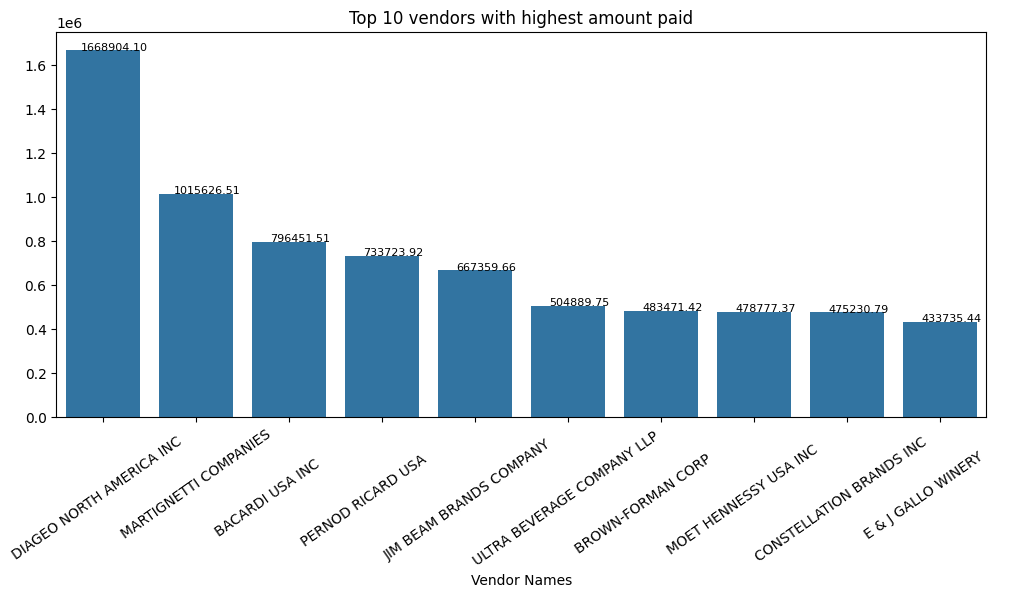

In [ ]:
# --- Top 10 vendors with highest amount paid ---
plt.figure(figsize=(12,5))
vc = invoice_purchases.groupby(['VendorName'])['Total Amount'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values)
for i, value in enumerate(vc):
    g.text(y=value-2, x=i+0.125, s=f'{value:.2f}', color='black', ha='center', fontsize=8)
plt.title('Top 10 vendors with highest amount paid')
plt.xlabel('Vendor Names')
plt.xticks(rotation=35)
plt.show()

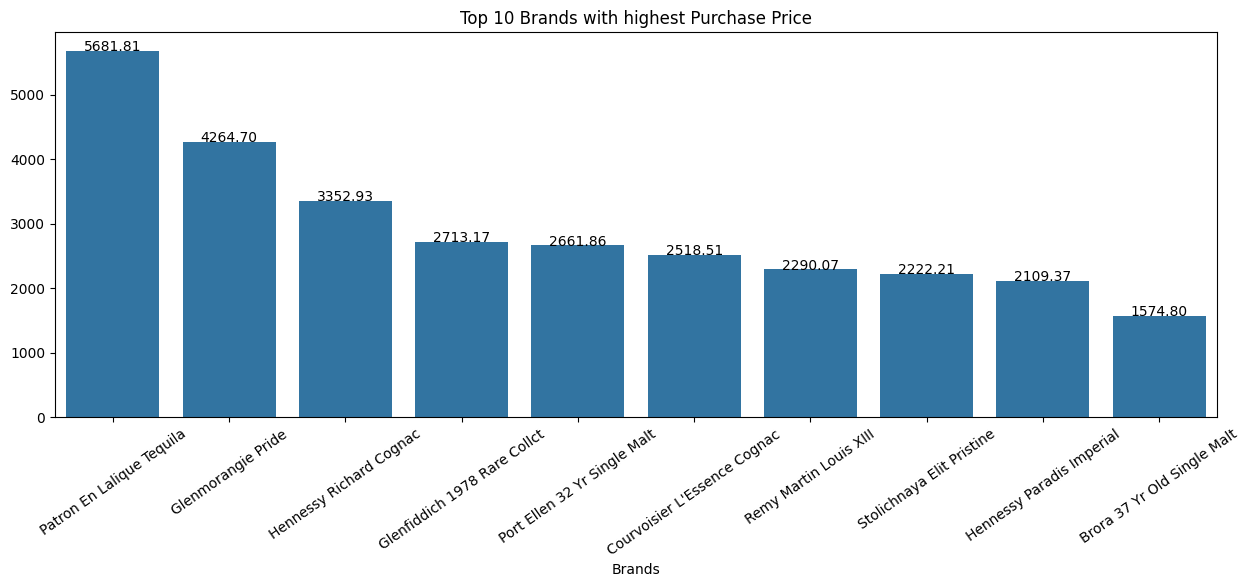


Final Sales with Total Amount:
            InventoryId  Store  Brand                 Description   Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses  750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses  750mL   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   

   ExciseTax  VendorNo                   VendorName  Total Amount  
0       0.79     12546  JIM BEAM BRANDS COMPANY             17.28  
1       1.57     12546  JIM BEAM BRANDS COMPANY             34.55  


In [ ]:
# --- Top 10 Brands with highest Purchase Price ---
plt.figure(figsize=(15,5))
vc = final_purchases.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values)
for i, value in enumerate(vc):
    g.text(x=i, y=value, s=f'{value:.2f}', ha='center', color='black', fontsize=10)
plt.title('Top 10 Brands with highest Purchase Price')
plt.xlabel('Brands')
plt.xticks(rotation=35)
plt.show()

# --- Feature Engineering: Total Amount for Sales ---
final_sales['Total Amount'] = final_sales['SalesDollars'] + final_sales['ExciseTax']
print("\nFinal Sales with Total Amount:\n", final_sales.head(2))

/tmp/ipython-input-1643960074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=vc.index, y=vc.values, palette="Set2")


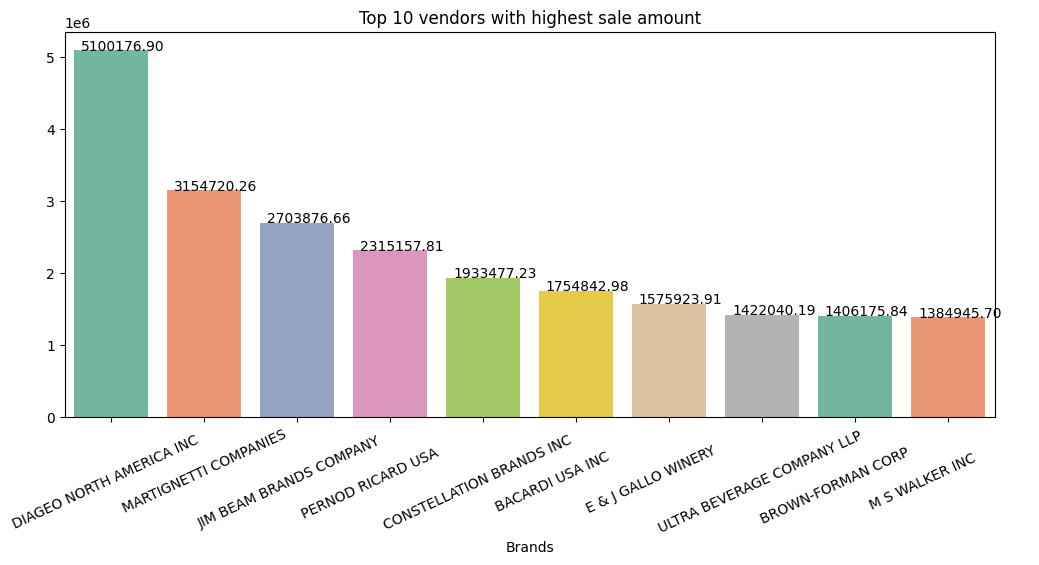

In [ ]:
# --- Top 10 vendors with highest sale amount ---
plt.figure(figsize=(12,5))
vc = final_sales.groupby(['VendorName'])['Total Amount'].sum().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values, palette="Set2")
for i, value in enumerate(vc):
    g.text(y=value-2, x=i+0.125, s=f'{value:.2f}', ha='center', color='black', fontsize=10)
plt.title('Top 10 vendors with highest sale amount')
plt.xlabel('Brands')
plt.xticks(rotation=25)
plt.show()

/tmp/ipython-input-3226203237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=vc.index, y=vc.values, palette="Set2")


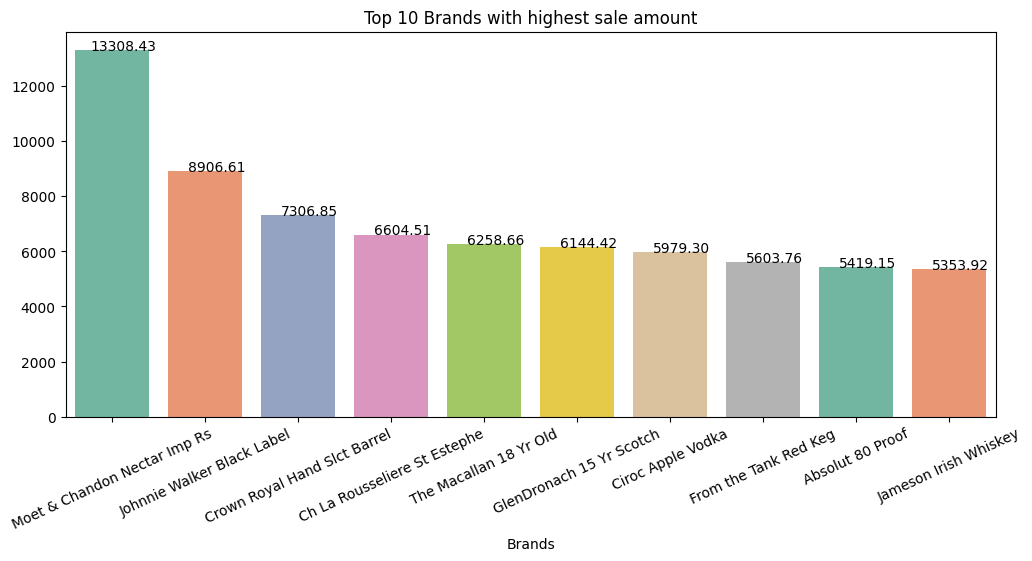

In [ ]:
# --- Top 10 Brands with highest sale amount ---
plt.figure(figsize=(12,5))
vc = final_sales.groupby(['Description'])['Total Amount'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values, palette="Set2")
for i, value in enumerate(vc):
    g.text(y=value-2, x=i+0.125, s=f'{value:.2f}', ha='center', color='black', fontsize=10)
plt.title('Top 10 Brands with highest sale amount')
plt.xlabel('Brands')
plt.xticks(rotation=25)
plt.show()

/tmp/ipython-input-3109658293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=vc.index, y=vc.values, palette="Set2")


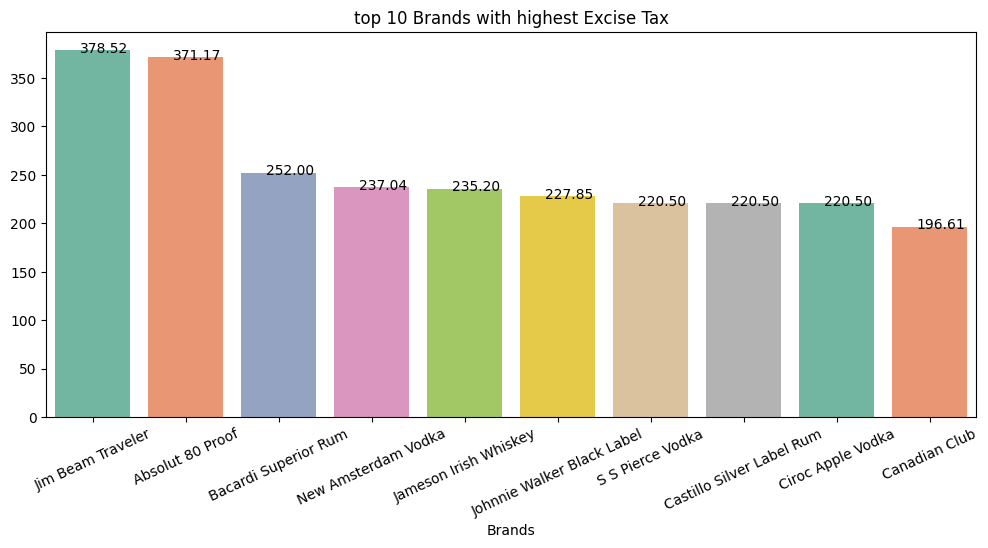

In [ ]:
# --- top 10 Brands with highest Excise Tax ---
plt.figure(figsize=(12,5))
vc = final_sales.groupby(['Description'])['ExciseTax'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values, palette="Set2")
for i, value in enumerate(vc):
    g.text(y=value-2, x=i+0.125, s=f'{value:.2f}', ha='center', color='black', fontsize=10)
plt.title('top 10 Brands with highest Excise Tax')
plt.xlabel('Brands')
plt.xticks(rotation=25)
plt.show()

/tmp/ipython-input-4022983014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=vc.index, y=vc.values, palette="Set1")


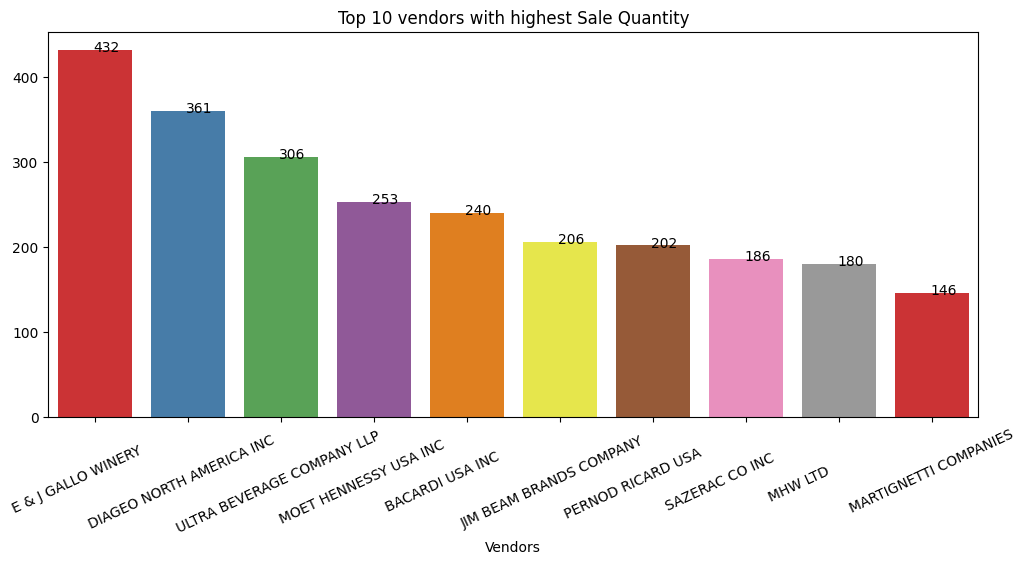

In [ ]:
# --- Top 10 vendors with highest Sale Quantity ---
plt.figure(figsize=(12,5))
vc = final_sales.groupby(['VendorName'])['SalesQuantity'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y=vc.values, palette="Set1")
for i, value in enumerate(vc):
    g.text(y=value-2, x=i+0.125, s=value, ha='center', color='black', fontsize=10)
plt.title('Top 10 vendors with highest Sale Quantity')
plt.xlabel('Vendors')
plt.xticks(rotation=25)
plt.show()
